In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

Preprocesamiento

In [ ]:
#Importación de los datos del dataset y Mostrar las primeras y últimas filas del dataframe importado

wines = pd.read_csv('/content/WineQT.csv')
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
# Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)
media = np.mean(wines)
media

fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64

In [ ]:
mediana = np.median(wines)
mediana

3.34

In [ ]:
varianza = np.var(wines)
varianza

fixed acidity                3.051416
volatile acidity             0.032240
citric acid                  0.038651
residual sugar               1.836904
chlorides                    0.002232
free sulfur dioxide        104.980539
total sulfur dioxide      1073.727850
density                      0.000004
pH                           0.024522
sulphates                    0.029010
alcohol                      1.170123
quality                      0.648785
Id                      215104.965816
dtype: float64

In [ ]:
desviacion_tipica = np.std(wines)
desviacion_tipica

fixed acidity             1.746830
volatile acidity          0.179555
citric acid               0.196600
residual sugar            1.355324
chlorides                 0.047247
free sulfur dioxide      10.246001
total sulfur dioxide     32.767787
density                   0.001924
pH                        0.156596
sulphates                 0.170324
alcohol                   1.081722
quality                   0.805472
Id                      463.794099
dtype: float64

In [ ]:
minimo = wines.min()
minimo

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
Id                      0.00000
dtype: float64

In [ ]:
maximo = wines.max()
maximo

fixed acidity             15.90000
volatile acidity           1.58000
citric acid                1.00000
residual sugar            15.50000
chlorides                  0.61100
free sulfur dioxide       68.00000
total sulfur dioxide     289.00000
density                    1.00369
pH                         4.01000
sulphates                  2.00000
alcohol                   14.90000
quality                    8.00000
Id                      1597.00000
dtype: float64

In [ ]:
Q1 = np.quantile(wines,0.25)
Q1

0.635

In [ ]:
Q3 = np.quantile(wines,0.75)
Q3

10.1

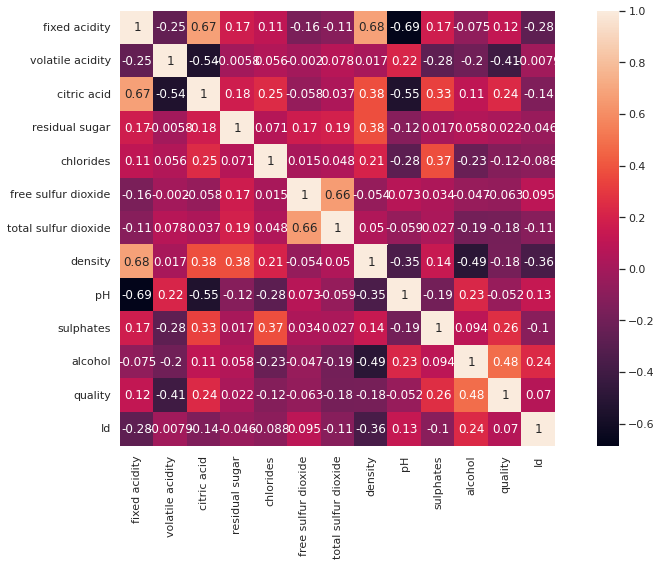

In [ ]:
# Mostrar un mapa de calor que indique la correlación entre variables
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(wines.corr(), square=True, annot=True)

In [ ]:
# Seleccionar las características a tener en cuenta en el estudio
#Se implementa en la parte de optimizacion
wine_opty = wines.drop('volatile acidity', axis = 1)

In [ ]:
# Separar datos entre datos de entrada y etiquetas (resultados)
x_wine = wines.drop('quality', axis = 1)
y_wine = wines['quality']
y_wine


0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [ ]:
# Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
x_train, x_test, y_train, y_test = train_test_split(x_wine,y_wine, random_state=1, test_size=0.25)


Entrenamiento y prediccion

In [ ]:
# Elegir, instanciar (eligiendo unos valores concretos, por ejemplo k=3 y w=’uniform’) y entrenar el modelo
k = 3
w = 'uniform'

model = KNeighborsClassifier(k, weights=w)
model.fit(x_train, y_train)

# Realizar una predicción con los datos de prueba
y_model = model.predict(x_test)


Evaluación

In [ ]:
# Mostrar el porcentaje de elementos correctamente clasificados

accuracy_score(y_test,y_model)

0.5734265734265734

In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
for i in (0,len(y_model)-1):
  print("prediccion: {a} real: {b}".format(a = y_model[i], b = y_wine[i]))

prediccion: 5 real: 5
prediccion: 5 real: 6


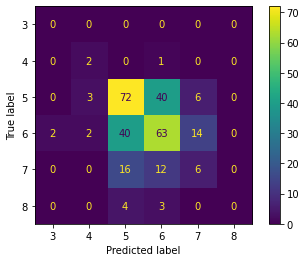

In [ ]:
# Representar gráficamente la clasificación obtenida (matriz de confusión)
ConfusionMatrixDisplay.from_predictions(y_test,y_model)

Optimización


In [ ]:
# parámetros: modelo, los datos de entrenamiento separados (x, y)
# y el KFold con los splits
# devuelve la media de las ejecuciones
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
    # obtengo cada partición
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]
    # entrenamiento
    model.fit(x_train_fold, y_train_fold)
    # predicción
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo
    acc = accuracy_score(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
kf = KFold(n_splits = 5)

for w in ['uniform','distance']:
  for k in range(1,31):
    model_opti = KNeighborsClassifier(k, weights=w)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))


Para k: 1 y w: uniform la media es: 0.488875288997688
Para k: 2 y w: uniform la media es: 0.4433632530939753
Para k: 3 y w: uniform la media es: 0.4328981368149055
Para k: 4 y w: uniform la media es: 0.4422480620155039
Para k: 5 y w: uniform la media es: 0.46789065687474496
Para k: 6 y w: uniform la media es: 0.4714606283149735
Para k: 7 y w: uniform la media es: 0.4865837073303413
Para k: 8 y w: uniform la media es: 0.46793825649394805
Para k: 9 y w: uniform la media es: 0.47959336325309393
Para k: 10 y w: uniform la media es: 0.46789065687474507
Para k: 11 y w: uniform la media es: 0.45743234054127574
Para k: 12 y w: uniform la media es: 0.45973752209982316
Para k: 13 y w: uniform la media es: 0.4620495036039712
Para k: 14 y w: uniform la media es: 0.4667006663946688
Para k: 15 y w: uniform la media es: 0.4701822385420916
Para k: 16 y w: uniform la media es: 0.4678634570923433
Para k: 17 y w: uniform la media es: 0.4748810009519924
Para k: 18 y w: uniform la media es: 0.4795457636338

In [ ]:

for w in ['uniform','distance']:
  for k in range(1,31):
    model_opti = KNeighborsClassifier(k, weights=w)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    if media_cruzada > 0.54:
      print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))
#Tras comprobar que la media ronda entre 0.45 de minima y 0.54 de maxima, con el if encuentro los mas optimos, en este caso para k = 30 y w = distance

Para k: 23 y w: distance la media es: 0.5413980688154496
Para k: 24 y w: distance la media es: 0.540235278117775
Para k: 25 y w: distance la media es: 0.5402420780633754
Para k: 28 y w: distance la media es: 0.5437236502107983
Para k: 29 y w: distance la media es: 0.5437100503195974
Para k: 30 y w: distance la media es: 0.5460628314973481
